In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 3. Исследование монотонности подпоследовательностей 

## Условие задачи

У нас есть **логистическое отображение**:

$$
x_{n+1} = f(x_n) = r \cdot x_n \cdot (1 - x_n)
$$

где $$( r \in (2; 3) )$$

**Дано:**
- \$( x^* = 1 - \frac{1}{r} \$) — неподвижная точка (\$( f(x^*) = x^* \$))
- \$( x_{2n} > x^* \$) для всех четных индексов
- \$( x_{2n+1} < x^* \$) для всех нечетных индексов

**Нужно доказать:**
- \$(\{x_{2n}\}\$) — монотонно убывает
- \$(\{x_{2n+1}\}\$) — монотонно возрастает

---
## Посмотрим на последовательности графиески:


Точки, где f(x) = x*:


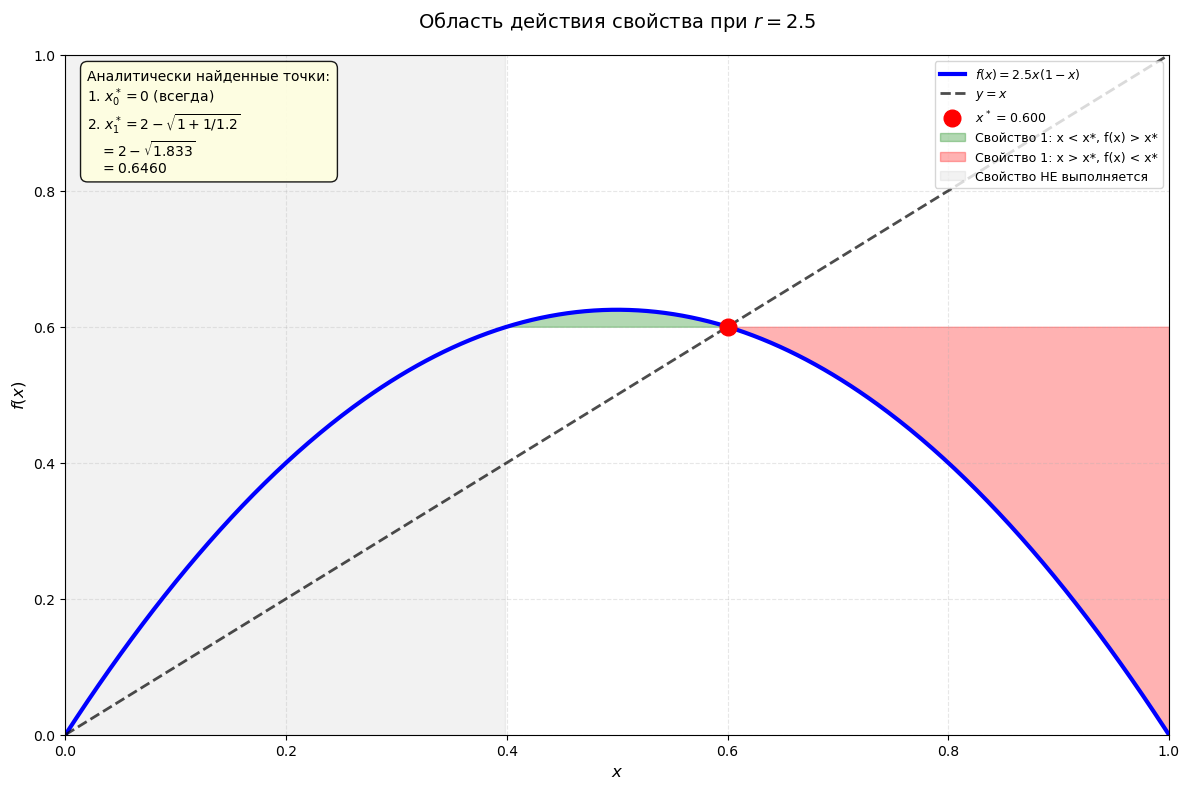

In [15]:
r = 2.5
x_star = 1 - 1/r

x = np.linspace(0, 1, 500)

y = r * x * (1 - x)
plt.figure(figsize=(12, 8))
plt.plot(x, y, 'b-', linewidth=3, label=f'$f(x) = {r}x(1-x)$')
plt.plot(x, x, 'k--', alpha=0.7, linewidth=2, label='$y = x$')
plt.plot(x_star, x_star, 'ro', markersize=12, label=f'$x^*$ = {x_star:.3f}')

a = r
b = -r
c = -x_star
discriminant = b**2 - 4*a*c
if discriminant >= 0:
    x1 = (-b + np.sqrt(discriminant)) / (2*a)
    x2 = (-b - np.sqrt(discriminant)) / (2*a)
    
    intersection_points = sorted([x for x in [x1, x2] if 0 <= x <= 1])
    
    print(f"\nТочки, где f(x) = x*:")
    for i, point in enumerate(intersection_points):
        print(f"  x_{i} = {point:.4f}")
        plt.plot(point, x_star, 'mo', markersize=10, 
                label=f'f(x) = x* при x={point:.3f}' if i == 0 else "")

# Найдем, где f(x) > x* и где f(x) < x*
mask_f_gt_xstar = y > x_star  # где f(x) > x*
mask_f_lt_xstar = y < x_star  # где f(x) < x*

# 1) x < x* и f(x) > x*
mask_property1_left = (x < x_star) & mask_f_gt_xstar
# 2) x > x* и f(x) < x*
mask_property1_right = (x > x_star) & mask_f_lt_xstar

#Область, где свойство не работает:
mask_not_work = ~(mask_property1_left | mask_property1_right)
plt.fill_between(x[mask_property1_left], y[mask_property1_left], x_star,
                 alpha=0.3, color='green', label='Свойство 1: x < x*, f(x) > x*')

plt.fill_between(x[mask_property1_right], x_star, y[mask_property1_right],
                 alpha=0.3, color='red', label='Свойство 1: x > x*, f(x) < x*')

plt.fill_between(x[mask_not_work], 0, 1,
                 alpha=0.1, color='gray', label='Свойство НЕ выполняется')


plt.xlabel('$x$', fontsize=12)
plt.ylabel('$f(x)$', fontsize=12)
plt.title(f'Область действия свойства при $r = {r}$', fontsize=14, pad=20)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc='upper right', fontsize=9)
plt.text(0.02, 0.98, info_text, fontsize=10,
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.9),
         verticalalignment='top')
plt.tight_layout()
plt.show()


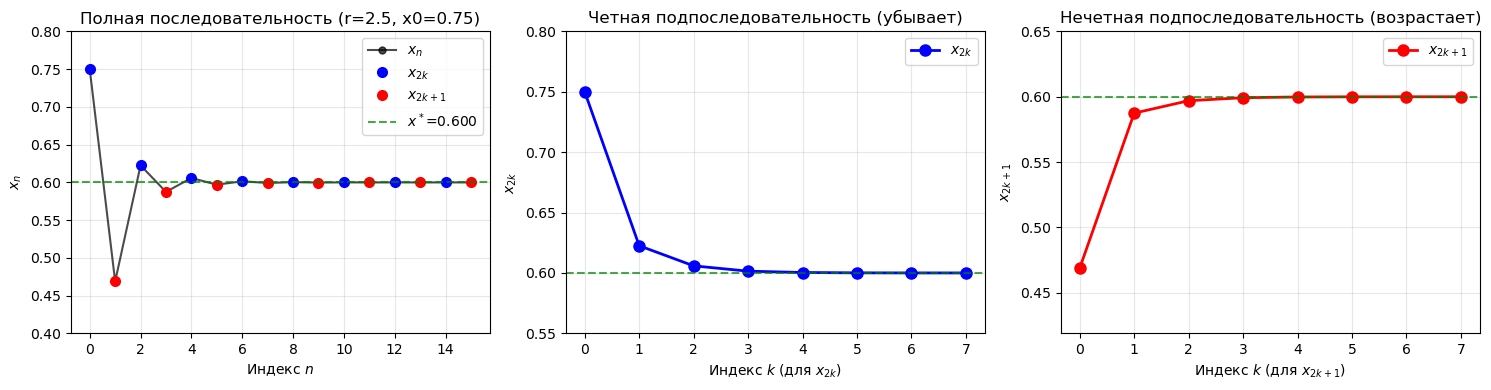


Табл значений (r=2.5, x0=0.75):
--------------------------------------------------
  n |        x_n |    x_n vs x* |   Четность
--------------------------------------------------
  0 |   0.750000 | x_0 > x* |     Четный
  1 |   0.468750 | x_1 < x* |   Нечетный
  2 |   0.622559 | x_2 > x* |     Четный
  3 |   0.587448 | x_3 < x* |   Нечетный
  4 |   0.605882 | x_4 > x* |     Четный
  5 |   0.596973 | x_5 < x* |   Нечетный
  6 |   0.601491 | x_6 > x* |     Четный
  7 |   0.599249 | x_7 < x* |   Нечетный
  8 |   0.600374 | x_8 > x* |     Четный
  9 |   0.599813 | x_9 < x* |   Нечетный


In [1]:
r = 2.5
x_star = 1 - 1/r
x0 = x_star + 0.15 #Начальное значение > x*

sequence = [x0]
for i in range(15):
    sequence.append(r * sequence[-1] * (1 - sequence[-1]))

even_seq = [sequence[i] for i in range(0, len(sequence), 2)]
odd_seq = [sequence[i] for i in range(1, len(sequence), 2)]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
#Вся последовательность
ax1 = axes[0]
indices = list(range(len(sequence)))
ax1.plot(indices, sequence, 'ko-', markersize=5, alpha=0.7, label='$x_n$')

# Отмечаем четные и нечетные точки
for i, val in enumerate(sequence):
    if i % 2 == 0:
        ax1.plot(i, val, 'bo', markersize=7, label='$x_{2k}$' if i == 0 else "")
    else:
        ax1.plot(i, val, 'ro', markersize=7, label='$x_{2k+1}$' if i == 1 else "")

ax1.axhline(y=x_star, color='green', linestyle='--', alpha=0.7, 
           label=f'$x^*$={x_star:.3f}')
ax1.set_xlabel('Индекс $n$')
ax1.set_ylabel('$x_n$')
ax1.set_title(f'Полная последовательность (r={r}, x0={x0})')
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right')
ax1.set_ylim([0.4, 0.8])

#Четная подпоследовательность
ax2 = axes[1]
even_indices = list(range(len(even_seq)))
ax2.plot(even_indices, even_seq, 'bo-', markersize=8, linewidth=2, 
        label='$x_{2k}$')


ax2.axhline(y=x_star, color='green', linestyle='--', alpha=0.7)
ax2.set_xlabel('Индекс $k$ (для $x_{2k}$)')
ax2.set_ylabel('$x_{2k}$')
ax2.set_title('Четная подпоследовательность (убывает)')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_ylim([x_star-0.05, max(even_seq)+0.05])

#Нечетная подпоследовательность
ax3 = axes[2]
odd_indices = list(range(len(odd_seq)))
ax3.plot(odd_indices, odd_seq, 'ro-', markersize=8, linewidth=2,
        label='$x_{2k+1}$')

ax3.axhline(y=x_star, color='green', linestyle='--', alpha=0.7)
ax3.set_xlabel('Индекс $k$ (для $x_{2k+1}$)')
ax3.set_ylabel('$x_{2k+1}$')
ax3.set_title('Нечетная подпоследовательность (возрастает)')
ax3.grid(True, alpha=0.3)
ax3.legend()
ax3.set_ylim([min(odd_seq)-0.05, x_star+0.05])
plt.tight_layout()
plt.show()

print("\nТабл значений (r=2.5, x0=0.75):")
print("-"*50)
print(f"{'n':>3} | {'x_n':>10} | {'x_n vs x*':>12} | {'Четность':>10}")
print("-"*50)
for i, val in enumerate(sequence[:10]):
    vs = ">" if val > x_star else "<" if val < x_star else "="
    parity = "Четный" if i % 2 == 0 else "Нечетный"
    print(f"{i:3d} | {val:10.6f} | x_{i} {vs} x* | {parity:>10}")
    


## 2. Наблюдения из графиков

   - Четные члены всегда выше $x^*$
   - Нечетные члены всегда ниже $x^*$

2. **Монотонность четных членов:** Каждый следующий четный член меньше предыдущего:
   $$
   x_0 > x_2 > x_4 > \dots > x^*
   $$

3. **Монотонность нечетных членов:** Каждый следующий нечетный член больше предыдущего:
   $$
   x_1 < x_3 < x_5 < \dots < x^*
   $$


---

## Доказательство 

### 1 Исходные данные

**Для примера $r = 2.5$:**
- $r = 2.5 \in (2; 3)$
- $x^* = 1 - \frac{1}{r} = 1 - \frac{1}{2.5} = 1 - 0.4 = 0.6$
- Условия: $x_{2n} > x^*$, $x_{2n+1} < x^*$

### 2 Свойство 1: Поведение $f(x)$ относительно $x^*$

- Для любого $x > x^*$: $f(x) < x^*$
- Для любого $x < x^*$: $f(x) > x^*$

1. Рассмотрим функцию $f(x) = r \cdot x \cdot (1 - x)$
2. При $r \in (2; 3)$ вершина параболы находится в точке $x = 0.5$
3. Значение в вершине: $f(0.5) = r/4 \in (0.5; 0.75)$
4. Неподвижная точка: $x^* = 1 - 1/r \in (0.5; 0.667)$

Следовательно:
$$
\begin{cases}
x > x^* \Rightarrow f(x) < x^* \\
x < x^* \Rightarrow f(x) > x^*
\end{cases}
$$

### 3 Свойство 2: Поведение $f(f(x))$ относительно $x$

**Рассмотрим случай $x > x^*$:**

1. По свойству 1: $x > x^* \Rightarrow f(x) < x^*$
2. Применяем свойство 1 к $f(x) < x^*$: $f(f(x)) > x^*$

**Рассмотрим случай $x < x^*$:**

1. По свойству 1: $x < x^* \Rightarrow f(x) > x^*$
2. Применяем свойство 1 к $f(x) > x^*$: $f(f(x)) < x^*$

- Для $x > x^*$: $f(f(x)) < x$
- Для $x < x^*$: $f(f(x)) > x$

**Это верно, так как:**
Пусть $g(x) = f(f(x))$:
- $g(x^*) = f(f(x^*)) = f(x^*) = x^*$ (так как $x^*$ - неподвижная точка)
- График $g(x)$ пересекает прямую $y = x$ только в точке $x^*$ в окрестности этой точки

### 4 Доказательство для четной подпоследовательности $\{x_{2n}\}$

**По усл:$x_{2n} > x^*$.**

1. **Шаг 1:** $x_{2n+1} = f(x_{2n})$
   - Так как $x_{2n} > x^*$, по свойству 1: $f(x_{2n}) < x^*$
   - Следовательно: $x_{2n+1} < x^*$

2. **Шаг 2:** $x_{2n+2} = f(x_{2n+1}) = f(f(x_{2n}))$
   - Так как $x_{2n+1} < x^*$, по свойству 1: $f(x_{2n+1}) > x^*$
   - Следовательно: $x_{2n+2} > x^*$

3. **Шаг 3:** Сравним $x_{2n+2}$ и $x_{2n}$:
   - $x_{2n+2} = f(f(x_{2n}))$
   - Так как $x_{2n} > x^*$, по свойству 2: $f(f(x_{2n})) < x_{2n}$
   - Следовательно: $x_{2n+2} < x_{2n}$

4. **Шаг 4:** Имеем цепочку неравенств:
   $$
   x_{2n} > x_{2n+2} > x^*
   $$

**Вывод:** Последовательность $\{x_{2n}\}$ монотонно убывает, оставаясь выше $x^*$.

### 5 Доказательство для нечетной подпоследовательности $\{x_{2n+1}\}$

**По условию $x_{2n+1} < x^*$.**

1. **Шаг 1:** $x_{2n+2} = f(x_{2n+1})$
   - Так как $x_{2n+1} < x^*$, по свойству 1: $f(x_{2n+1}) > x^*$
   - Следовательно: $x_{2n+2} > x^*$

2. **Шаг 2:** $x_{2n+3} = f(x_{2n+2}) = f(f(x_{2n+1}))$
   - Так как $x_{2n+2} > x^*$, по свойству 1: $f(x_{2n+2}) < x^*$
   - Следовательно: $x_{2n+3} < x^*$

3. **Шаг 3:** Сравним $x_{2n+3}$ и $x_{2n+1}$:
   - $x_{2n+3} = f(f(x_{2n+1}))$
   - Так как $x_{2n+1} < x^*$, по свойству 2: $f(f(x_{2n+1})) > x_{2n+1}$
   - Следовательно: $x_{2n+3} > x_{2n+1}$

4. **Шаг 4:** Имеем цепочку неравенств:
   $$
   x_{2n+1} < x_{2n+3} < x^*
   $$

**Вывод:** Последовательность $\{x_{2n+1}\}$ монотонно возрастает, оставаясь ниже $x^*$.



# 4.1 Найти неподвижную точку для g(x)



## Условие задачи

Для логистического отображения известно, что при начальных условиях $x_0 \in (0; 1)$ и параметре $r \in (1; 3]$ выполняется:

$$
\lim_{n \to \infty} x_n = x^*
$$

где $x^*$ — неподвижная точка.

**Задание:** Аналитически найти неподвижную точку.

---
**Неподвижная точка** $x^*$ точечного отображения $g(x)$ — это такое значение, которое удовлетворяет уравнению:

$$
x^* = g(x^*)
$$

То есть, если система находится в состоянии $x^*$, то после применения отображения она остаётся в том же состоянии.

---

## Решение 


отображение имеет вид:

$$
g(x) = r \cdot x \cdot (1 - x) \cdot (3 - x)
$$

где $r \in \left[0; \frac{27}{2(7\sqrt{7} - 10)}\right] \approx [0; 1.5848]$.

### Аналитическое нахождение неподвижной точки

#### Шаг 1: Составляем уравнение

Для нахождения неподвижной точки решаем уравнение:

$$
x = g(x) = r \cdot x \cdot (1 - x) \cdot (3 - x)
$$

#### Шаг 2: Упрощаем уравнение

Переносим всё в одну сторону:

$$
x - r \cdot x \cdot (1 - x) \cdot (3 - x) = 0
$$

Выносим $x$ за скобки:

$$
x \cdot \left[ 1 - r \cdot (1 - x) \cdot (3 - x) \right] = 0
$$

#### Шаг 3: Решаем получившееся уравнение

Получаем два уравнения:

1. **Тривиальное решение:**
   $$
   x = 0
   $$
   Это неподвижная точка при любом $r$.

2. **Нетривиальное решение:**
   $$
   1 - r \cdot (1 - x) \cdot (3 - x) = 0
   $$

#### Шаг 4: Решаем нетривиальное уравнение

Раскрываем скобки:

$$
(1 - x) \cdot (3 - x) = 3 - x - 3x + x^2 = 3 - 4x + x^2
$$

Подставляем:

$$
1 - r \cdot (3 - 4x + x^2) = 0
$$

$$
r \cdot (3 - 4x + x^2) = 1
$$

$$
3 - 4x + x^2 = \frac{1}{r}
$$

Приводим к стандартному виду квадратного уравнения:

$$
x^2 - 4x + \left(3 - \frac{1}{r}\right) = 0
$$

#### Шаг 5: Решаем квадратное уравнение

Коэффициенты:
$$
a = 1, \quad b = -4, \quad c = 3 - \frac{1}{r}
$$

Дискриминант:
$$
D = b^2 - 4ac = (-4)^2 - 4 \cdot 1 \cdot \left(3 - \frac{1}{r}\right)
$$
$$
D = 16 - 4\left(3 - \frac{1}{r}\right) = 16 - 12 + \frac{4}{r} = 4 + \frac{4}{r}
$$

Корни:
$$
x_{1,2} = \frac{-b \pm \sqrt{D}}{2a} = \frac{4 \pm \sqrt{4 + \frac{4}{r}}}{2} = \frac{4 \pm 2\sqrt{1 + \frac{1}{r}}}{2}
$$
$$
x_{1,2} = 2 \pm \sqrt{1 + \frac{1}{r}}
$$

#### Шаг 6: Анализ полученных корней

Получаем два корня:

1. $$
   x_1 = 2 - \sqrt{1 + \frac{1}{r}}
   $$

2. $$
   x_2 = 2 + \sqrt{1 + \frac{1}{r}}
   $$

**Анализируем, какие корни лежат в допустимом диапазоне $x \in [0, 1]$:**

1. **Корень $x_2$:**
   $$
   x_2 = 2 + \sqrt{1 + \frac{1}{r}} > 2 > 1
   $$
   Этот корень всегда больше 1, поэтому не подходит.

2. **Корень $x_1$:**
   $$
   x_1 = 2 - \sqrt{1 + \frac{1}{r}}
   $$
   
   Проверим условия:
   - $x_1 > 0$:
     $$
     2 - \sqrt{1 + \frac{1}{r}} > 0 \Rightarrow \sqrt{1 + \frac{1}{r}} < 2 \Rightarrow 1 + \frac{1}{r} < 4 \Rightarrow \frac{1}{r} < 3 \Rightarrow r > \frac{1}{3}
     $$
   
   - $x_1 < 1$:
     $$
     2 - \sqrt{1 + \frac{1}{r}} < 1 \Rightarrow \sqrt{1 + \frac{1}{r}} > 1 \Rightarrow 1 + \frac{1}{r} > 1 \Rightarrow \frac{1}{r} > 0 \Rightarrow r > 0
     $$

### Итоговый результат

**Неподвижные точки отображения $g(x)$:**

1. **Тривиальная точка** (всегда существует):
   $$
   x^*_0 = 0
   $$

2. **Нетривиальная точка** (существует при $r > \frac{1}{3}$):
   $$
   x^*_1 = 2 - \sqrt{1 + \frac{1}{r}}
   $$

---

## Графическая иллюстрация

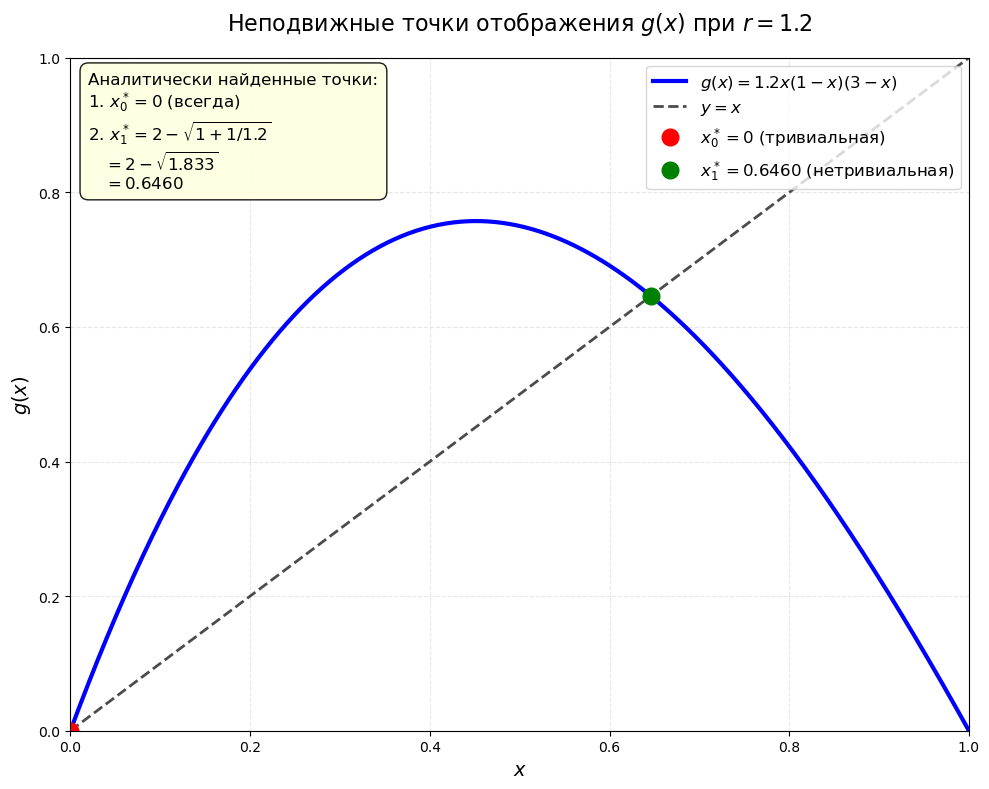

In [14]:

r = 1.2  
x_star_0 = 0  # Тривиальная точка
x_star_1 = 2 - np.sqrt(1 + 1/r)  # Нетривиальная точка

plt.figure(figsize=(10, 8))
x = np.linspace(0, 1, 500)
g_x = r * x * (1 - x) * (3 - x)

plt.plot(x, g_x, 'b-', linewidth=3, label=f'$g(x) = {r}x(1-x)(3-x)$')
plt.plot(x, x, 'k--', alpha=0.7, linewidth=2, label='$y = x$')
plt.plot(x_star_0, x_star_0, 'ro', markersize=12, 
         label=f'$x^*_0 = {x_star_0}$ (тривиальная)')

#Нетривиальная точка (если существует)
if r > 1/3:
    plt.plot(x_star_1, x_star_1, 'go', markersize=12,
             label=f'$x^*_1 = {x_star_1:.4f}$ (нетривиальная)')
    check_value = r * x_star_1 * (1 - x_star_1) * (3 - x_star_1)


plt.xlabel('$x$', fontsize=14)
plt.ylabel('$g(x)$', fontsize=14)
plt.title(f'Неподвижные точки отображения $g(x)$ при $r={r}$', fontsize=16, pad=20)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(loc='upper right', fontsize=12)

plt.text(0.02, 0.98, info_text, fontsize=12,
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.9))

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.tight_layout()
plt.show()


# 4.2 диапазон параметра r, при котором оследовательность монотонно сходится к нулю

## Условие

Отображение: $g(x) = r \cdot x \cdot (1 - x) \cdot (3 - x)$  
Найти диапазон $r$, при котором $x_n \to 0$ монотонно.

---

### 1. Условие монотонной сходимости к нулю

Чтобы последовательность монотонно сходилась к 0, нужно чтобы выполнялось 2 условия:
1. $g(x) < x$ для всех $x \in (0, 1)$
- Если мы хотим **монотонного убывания** последовательности:

$$
x_0 > x_1 > x_2 > \dots > 0
$$

Тогда каждый шаг должен удовлетворять:

$$
x_{n+1} = g(x_n) < x_n
$$

- Поскольку начальное значение $x_0$ может быть любым в $(0, 1)$, то условие должно выполняться **для всех** $x \in (0, 1)$.

2. $x = 0$ - единственная неподвижная точка

- **Неподвижная точка** — это такое $x^*$, что $g(x^*) = x^*$.

- Если существует другая неподвижная точка $x^* > 0$, то:

1. Начиная с $x_0 = x^*$, последовательность останется на $x^*$ (не сойдется к 0)
2. Начиная с $x_0$ близких к $x^*$, последовательность будет стремиться к $x^*$, а не к 0

### 2. Упрощаем условие $g(x) < x$

$$
g(x) = r \cdot x \cdot (1 - x) \cdot (3 - x) < x
$$

Делим на $x > 0$:
$$
r \cdot (1 - x) \cdot (3 - x) < 1
$$

### 3. Находим максимум левой части

Функция $h(x) = (1-x)(3-x)$ на $[0, 1]$:

- При $x = 0$: $h(0) = (1-0)(3-0) = 3$
- При $x = 1$: $h(1) = (1-1)(3-1) = 0$
- Функция убывает, так как это парабола ветвями вверх с минимумом при $x = 2$ (вне [0,1])

**Максимум:** $h_{\text{max}} = 3$ при $x = 0$

### 4. Критическое условие

Чтобы $r \cdot h(x) < 1$ для всех $x \in (0, 1)$, достаточно:
$$
r \cdot 3 < 1 \quad \Rightarrow \quad r < \frac{1}{3}
$$

### 5. Почему это необходимо?

Если $r \geq \frac{1}{3}$, то при малых $x$:
$$
g(x) \approx r \cdot x \cdot 1 \cdot 3 = 3r \cdot x \geq x
$$
Значит, $g(x) \geq x$ для малых $x$, и сходимость к 0 невозможна.

---

## Результат

**Диапазон:** $0 \leq r < \frac{1}{3}$

При $r \geq \frac{1}{3}$ появляется ненулевая неподвижная точка $x^* = 2 - \sqrt{1 + \frac{1}{r}} > 0$, и система сходится к ней, а не к нулю.

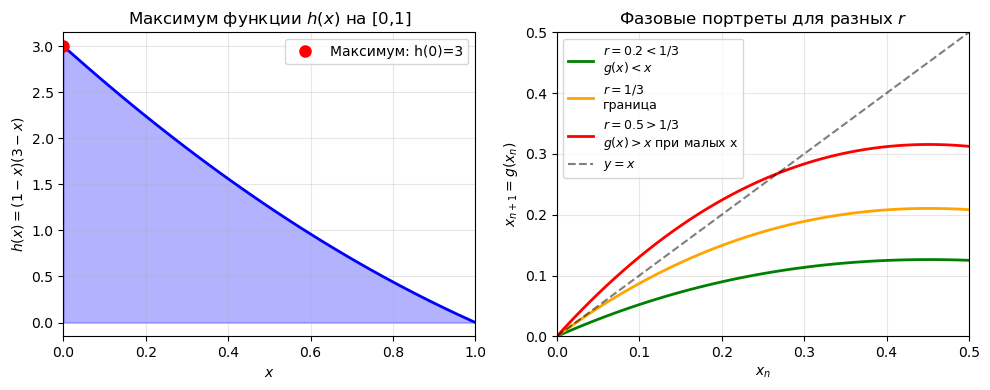

In [19]:
def g(x, r):
    return r * x * (1 - x) * (3 - x)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
x = np.linspace(0, 1, 100)
h_x = (1 - x) * (3 - x)
plt.plot(x, h_x, 'b-', linewidth=2)
plt.fill_between(x, 0, h_x, alpha=0.3, color='blue')
plt.plot([0, 0], [0, 3], 'r--', alpha=0.5)
plt.plot([0], [3], 'ro', markersize=8, label='Максимум: h(0)=3')
plt.xlabel('$x$')
plt.ylabel('$h(x) = (1-x)(3-x)$')
plt.title('Максимум функции $h(x)$ на [0,1]')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim([0, 1])


plt.subplot(1, 2, 2)
x = np.linspace(0, 1, 100)

# r < 1/3 (сходится к 0)
r1 = 0.2
y1 = g(x, r1)
plt.plot(x, y1, 'g-', linewidth=2, label=f'$r={r1} < 1/3$\n$g(x) < x$')

# r = 1/3 (граница)
r2 = 1/3
y2 = g(x, r2)
plt.plot(x, y2, 'orange', linewidth=2, label=f'$r=1/3$\nграница')

# r > 1/3 (сходится к x* > 0)
r3 = 0.5
y3 = g(x, r3)
plt.plot(x, y3, 'r-', linewidth=2, label=f'$r={r3} > 1/3$\n$g(x) > x$ при малых x')
plt.plot(x, x, 'k--', alpha=0.5, label='$y=x$')
plt.xlabel('$x_n$')
plt.ylabel('$x_{n+1} = g(x_n)$')
plt.title('Фазовые портреты для разных $r$')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=9)
plt.xlim([0, 0.5])
plt.ylim([0, 0.5])
plt.tight_layout()
plt.show()


# 4.3  графики зависимости xn от n для нескольких различных значений параметра r

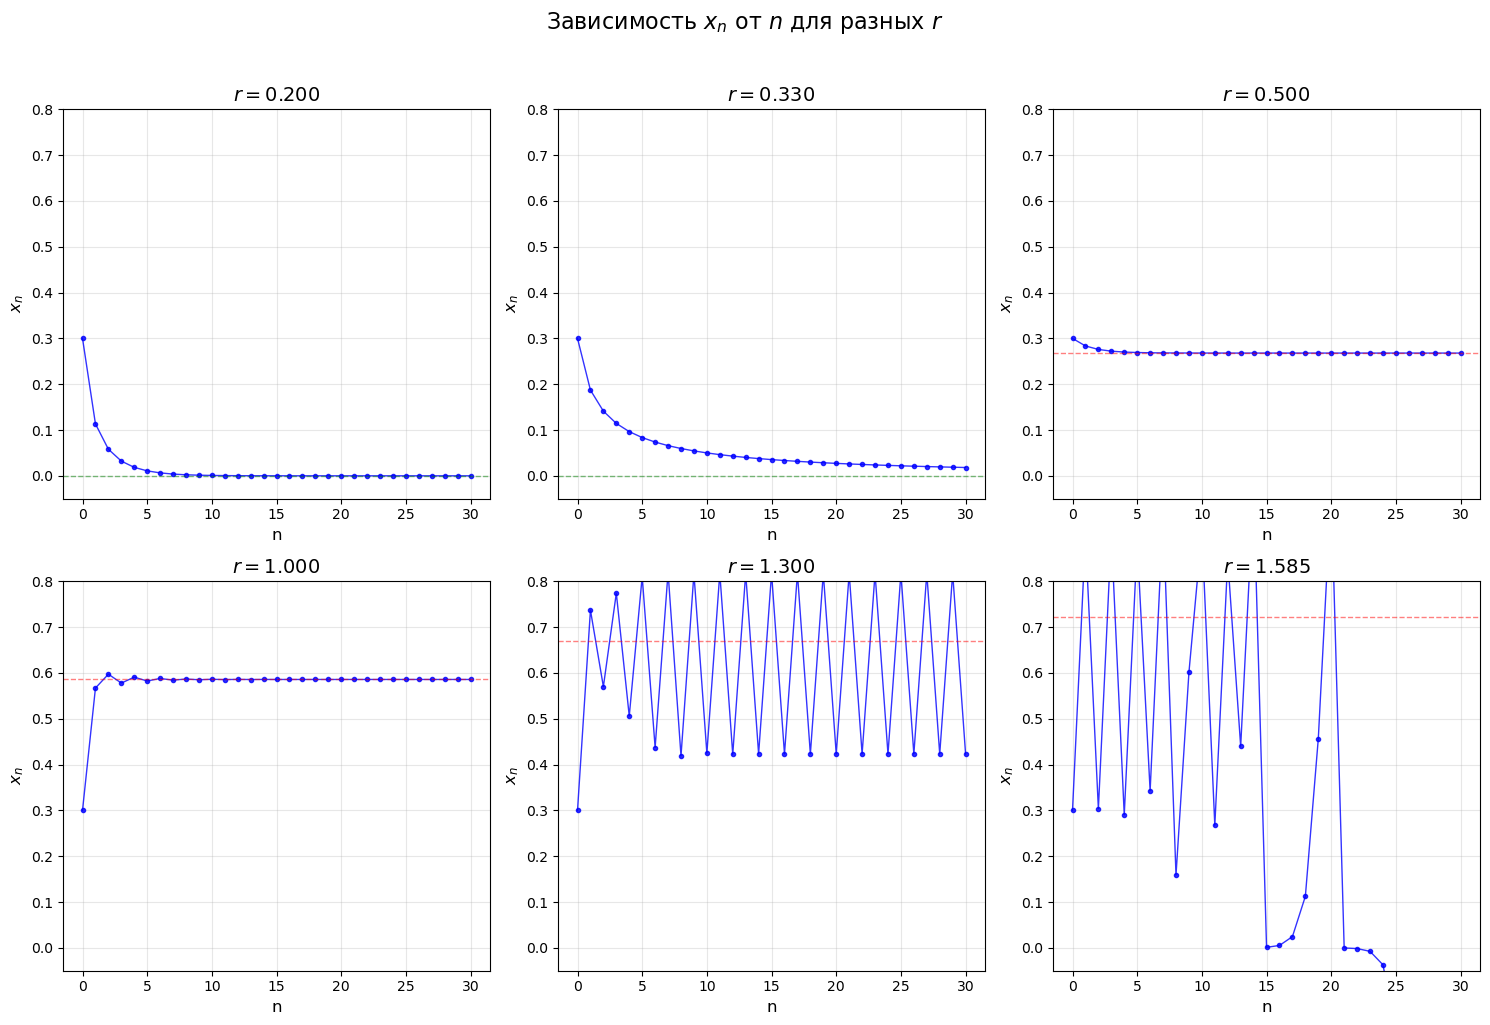

In [22]:

def g(x, r):
    return r * x * (1 - x) * (3 - x)
    
r_values = [0.2, 0.33, 0.5, 1.0, 1.3, 1.5848]
x0 = 0.3
n_iterations = 30
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, r in enumerate(r_values):
    ax = axes[idx]
    sequence = [x0]
    for i in range(n_iterations):
        sequence.append(g(sequence[-1], r))

    ax.plot(sequence, 'b-o', markersize=3, linewidth=1, alpha=0.8)
    if r < 1/3:
        ax.axhline(y=0, color='green', linestyle='--', alpha=0.5, linewidth=1)
    else:
        x_star = 2 - np.sqrt(1 + 1/r)
        ax.axhline(y=x_star, color='red', linestyle='--', alpha=0.5, linewidth=1)

    ax.set_xlabel('n', fontsize=12)
    ax.set_ylabel('$x_n$', fontsize=12)
    ax.set_title(f'$r = {r:.3f}$', fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.set_ylim([-0.05, 0.8])

plt.suptitle('Зависимость $x_n$ от $n$ для разных $r$', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()
